## import packages

In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
from scipy import stats
import statsmodels as sm
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn import metrics
import sys
import warnings
warnings.filterwarnings('ignore')


In [2]:
pd.set_option('display.max_columns', 100)

## load data

### seg1


In [3]:
data_rootpath = r'C:\Users\w10\Desktop\웰컴\AS\8주차(데이터추가추출부터)\model_data\seg1'

In [4]:
os.listdir(data_rootpath)

['model_validation_df.csv',
 'test_df.csv',
 'train_df.csv',
 'valid_df.csv',
 '필터링후']

In [5]:
train_df = pd.read_csv(os.path.join(data_rootpath, 'train_df.csv'))
valid_df = pd.read_csv(os.path.join(data_rootpath, 'valid_df.csv'))
test_df = pd.read_csv(os.path.join(data_rootpath, 'test_df.csv'))

In [6]:
print('Train')
print(train_df.shape)
print('\nValid')
print(valid_df.shape)
print('\nTest')
print(test_df.shape)

Train
(73533, 45)

Valid
(24728, 45)

Test
(24547, 45)


In [7]:
train_df.head(2)

,no,BAD,A5WC0000000200,PE1000011,PE0000025,PS0001728,A5RCLSRL078700,PS0000188,A5RCLSRL091300,A5RCLSRL027400,A5RCLSRL027300,A5RCLSRL027500,IDT000004_1,IDT000003,CA0000601,C00000083,C00060606,LA0000604,LU0000902_1,CF1231601,LC0000609,LA0000222_s12,LC0000608,LA0000203_s9,LS0000607,LC0000901,EW0001601_1,LA0000204_s12,LRZ00124G,LA0000204_s6,LA0000020_s9,LA1200206,LA0000227_s9,LA0000204_s3,AE0000005_1,P11252001_1,LA0000001_s12,EH0001601_1,LS0000086,P2E000500_9_1,LH000000E,LA0000001_s6,LA1200203,LA0600203,EH1201002_1
0,1,1,16000,0,0,0,0,289,11830,73.94,73.94,73.94,84,51,0,692,692,0,10000,0,0,0.00,0,0.00,0,7385,691,0.00,0,0.00,0.00,0,0.00,0.0,0,0,0.00,691,0,0.0,0,0.00,0,0,1
1,3,1,30000,9,0,11,3,170,29036,73.99,28.95,41.28,263,263,7752,476,3332,4153,4436,12,4153,843.96,833,1527.27,121,3058,274,1177.46,8899,2271.25,0.13,0,1655.59,-574.6,0,0,0.15,274,12649,0.0,121,0.21,18000,13000,1


In [8]:
train_df[train_df.duplicated(['no'], keep = False)]

,no,BAD,A5WC0000000200,PE1000011,PE0000025,PS0001728,A5RCLSRL078700,PS0000188,A5RCLSRL091300,A5RCLSRL027400,A5RCLSRL027300,A5RCLSRL027500,IDT000004_1,IDT000003,CA0000601,C00000083,C00060606,LA0000604,LU0000902_1,CF1231601,LC0000609,LA0000222_s12,LC0000608,LA0000203_s9,LS0000607,LC0000901,EW0001601_1,LA0000204_s12,LRZ00124G,LA0000204_s6,LA0000020_s9,LA1200206,LA0000227_s9,LA0000204_s3,AE0000005_1,P11252001_1,LA0000001_s12,EH0001601_1,LS0000086,P2E000500_9_1,LH000000E,LA0000001_s6,LA1200203,LA0600203,EH1201002_1


## set index

In [9]:
def set_index_and_sort(data, index_col):
    data.set_index(index_col, drop = True, inplace = True, verify_integrity = True)
    data.sort_index(inplace = True)
    return data

In [10]:
train_df = set_index_and_sort(train_df, 'no')
valid_df = set_index_and_sort(valid_df,'no')
test_df = set_index_and_sort(test_df,'no')

In [11]:
train_df.head(1)

,BAD,A5WC0000000200,PE1000011,PE0000025,PS0001728,A5RCLSRL078700,PS0000188,A5RCLSRL091300,A5RCLSRL027400,A5RCLSRL027300,A5RCLSRL027500,IDT000004_1,IDT000003,CA0000601,C00000083,C00060606,LA0000604,LU0000902_1,CF1231601,LC0000609,LA0000222_s12,LC0000608,LA0000203_s9,LS0000607,LC0000901,EW0001601_1,LA0000204_s12,LRZ00124G,LA0000204_s6,LA0000020_s9,LA1200206,LA0000227_s9,LA0000204_s3,AE0000005_1,P11252001_1,LA0000001_s12,EH0001601_1,LS0000086,P2E000500_9_1,LH000000E,LA0000001_s6,LA1200203,LA0600203,EH1201002_1
no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,16000,0,0,0,0,289,11830,73.94,73.94,73.94,84,51,0,692,692,0,10000,0,0,0.0,0,0.0,0,7385,691,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0.0,691,0,0.0,0,0.0,0,0,1


## X,y split

In [13]:
X_train = train_df.drop(['BAD'], axis=1)
X_valid = valid_df.drop(['BAD'], axis = 1)
X_test = test_df.drop(['BAD'], axis=1)

y_train = train_df[['BAD']]
y_valid = valid_df[['BAD']]
y_test = test_df[['BAD']]

In [14]:
X_train.shape

(73533, 42)

In [15]:
X_train.columns

Index(['PE1000011', 'PE0000025', 'PS0001728', 'A5RCLSRL078700', 'PS0000188',
       'A5RCLSRL091300', 'A5RCLSRL027400', 'A5RCLSRL027300', 'A5RCLSRL027500',
       'IDT000004_1', 'IDT000003', 'CA0000601', 'C00000083', 'C00060606',
       'LA0000604', 'LU0000902_1', 'CF1231601', 'LC0000609', 'LA0000222_s12',
       'LC0000608', 'LA0000203_s9', 'LS0000607', 'LC0000901', 'EW0001601_1',
       'LA0000204_s12', 'LRZ00124G', 'LA0000204_s6', 'LA0000020_s9',
       'LA1200206', 'LA0000227_s9', 'LA0000204_s3', 'AE0000005_1',
       'P11252001_1', 'LA0000001_s12', 'EH0001601_1', 'LS0000086',
       'P2E000500_9_1', 'LH000000E', 'LA0000001_s6', 'LA1200203', 'LA0600203',
       'EH1201002_1'],
      dtype='object')

## Bad ratio

In [16]:
print('Train')
print(y_train['BAD'].value_counts(normalize = True) * 100,'\n')

print('Valid')
print(y_valid['BAD'].value_counts(normalize = True) * 100,'\n')

print('Test')
print(y_test['BAD'].value_counts(normalize = True) * 100)

Train
0    59.661649
1    40.338351
Name: BAD, dtype: float64 

Valid
0    59.620673
1    40.379327
Name: BAD, dtype: float64 

Test
0    59.661058
1    40.338942
Name: BAD, dtype: float64


## 모델적합 필요 packages

In [17]:

from sklearn.ensemble import GradientBoostingClassifier

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from matplotlib import pyplot
rcParams['figure.figsize'] = 12, 4
from xgboost import plot_importance
import statsmodels as sm
from statsmodels.distributions.empirical_distribution import ECDF
from scipy import stats
import shap
from datetime import datetime
from time import time


### Performance function

In [18]:
def get_accuracy(probs, labels, accu_thre=0.5):
    pred_labels = np.zeros(probs.shape)
    pred_labels[probs >= accu_thre] = 1.0
    accuracy = metrics.accuracy_score(labels, pred_labels)
    return accuracy

def get_ks_statistics(probs, labels):
    probs_pos = probs[labels == 1]
    probs_neg = probs[labels == 0]
    ks, ks_p_value = stats.ks_2samp(probs_pos, probs_neg)
    return ks, ks_p_value

def get_auc_ar(probs, labels):
    auc = metrics.roc_auc_score(labels, probs)
    ar = auc * 2 - 1
    return auc, ar

class Performances:
    def __init__(self, probs, labels, accu_thre=0.5):
        accuracy = get_accuracy(probs, labels, accu_thre=accu_thre)
        ks, ks_p_value = get_ks_statistics(probs, labels)
        auc, ar = get_auc_ar(probs, labels)
        self.accuracy = accuracy
        self.ks = ks * 100  # percent
        self.ks_p_value = ks_p_value
        self.auc = auc * 100  # percent
        self.ar = ar * 100  # percent

In [19]:
def get_ks_df(alg, x_df, y_true):
    
    result_df = pd.DataFrame()
    for i, prob in enumerate(alg.staged_predict_proba(x_df)):
        
        this_result = Performances(prob[:, 1], y_true['BAD'])
        this_ks = this_result.ks
        this_ar = this_result.ar
       
        this_result = {
            'KS' : this_ks,
            'AR' : this_ar
        }
        
        this_result_df = pd.DataFrame(this_result, index = [i])
        result_df = result_df.append(this_result_df)
        
        
    return result_df


In [20]:
def get_result_df(alg, xtrain, ytrain, xvalid, yvalid, xtest, ytest):
    
    n_est_df = {'n_estimators' : list(range(1, alg.get_params()['n_estimators'] + 1))}
    n_est_df = pd.DataFrame(n_est_df)
    train_result_df = get_ks_df(alg, xtrain, ytrain)
    train_result_df.columns = ['train_KS', 'train_AR']
    valid_result_df = get_ks_df(alg, xvalid, yvalid)
    valid_result_df.columns = ['valid_KS', 'valid_AR']
    test_result_df = get_ks_df(alg, xtest, ytest)
    test_result_df.columns = ['test_KS', 'test_AR']
    
    result_df = pd.concat([n_est_df, train_result_df, valid_result_df, test_result_df], axis = 1)
    result_df['diff_val_ks'] = abs(result_df['train_KS'] - result_df['valid_KS'])/result_df['train_KS']
    result_df['diff_tst_ks'] = abs(result_df['train_KS'] - result_df['test_KS'])/result_df['train_KS']
    result_df['diff_val_ar'] = abs(result_df['train_AR'] - result_df['valid_AR'])/result_df['train_AR']
    result_df['diff_tst_ar'] = abs(result_df['train_AR'] - result_df['test_AR'])/result_df['train_AR']
    
    params_df = alg.get_params()
    del params_df['n_estimators']
    params_df = pd.DataFrame(data = params_df, index = [0])
    result_df = params_df.assign(key = 1).merge(result_df.assign(key = 1), on = 'key').drop('key', 1)
    return result_df
    
    

In [21]:
def f_get_result(model, xtrain, ytrain, xvalid, yvalid, xtest, ytest):
    prob_tr = model.predict_proba(xtrain)
    prob_val = model.predict_proba(xvalid)
    prob_tst = model.predict_proba(xtest)
    
    result_tr = Performances(prob_tr[:, 1], ytrain['BAD'])
    result_val = Performances(prob_val[:, 1], yvalid['BAD'])
    result_tst = Performances(prob_tst[:, 1], ytest['BAD'])
    
    params_df = model.get_params()
    params_df = pd.DataFrame(params_df, index = [0])
    result_df = {
        'train_KS' : result_tr.ks,
        'valid_KS' : result_val.ks,
        'test_KS' : result_tst.ks,
        'train_AR' : result_tr.ar,
        'valid_AR' : result_val.ar,
        'test_AR' : result_tst.ar,
    }
    result_df = pd.DataFrame(result_df, index = [0])
    result_df = pd.concat([params_df, result_df], axis = 1)
    
    return(result_df)

In [22]:
def ks_stat(clf, X,y_true):
    y_pred_proba = clf.predict_proba(X)
    good_p = y_pred_proba[y_true['BAD'] == 0]
    bad_p = y_pred_proba[y_true['BAD']==1]
    
    return stats.ks_2samp(good_p[:,1] ,bad_p[:,1] ).statistic

In [23]:
cols_num = X_train.shape[1]

In [165]:
#random grid params
n_estimators = list(range(200, 501, 10))
# learning_rate =  [i/10000.0 for i in range(3, 11, 3)]
learning_rate = [i/100000 for i in [1,10,100,3,30,300,9,90,900]]
max_depth = list(range(3, 5, 1))
subsample = [i/100.0 for i in range(80,101, 1)]         # Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias.
min_samples_split =   [i/10000 for i in range(100, 301, 5)]      #높을 수록 underfitting 
min_samples_leaf = [i/10000 for i in range(100, 301, 5)]                    #높을 수록 underfitting but imbalanced data에서는 낮은 값 추천
max_features = list(range(4, 9, 1))     

In [166]:
learning_rate

[1e-05, 0.0001, 0.001, 3e-05, 0.0003, 0.003, 9e-05, 0.0009, 0.009]

In [167]:
import random

In [168]:
n_search_iters = 50
start = time()

for i in range(n_search_iters) :
    
    this_params = {
        'n_estimators' : random.choice(n_estimators),
        'learning_rate' : random.choice(learning_rate),
        'max_depth' : random.choice(max_depth),
        'subsample' :  random.choice(subsample),
        'min_samples_split' : random.choice(min_samples_split),
        'min_samples_leaf' : random.choice(min_samples_leaf),
        'max_features' : random.choice(max_features)
    }
    
    this_model = GradientBoostingClassifier(n_estimators = 200,
                                            learning_rate = this_params['learning_rate'],
                                            max_depth = this_params['max_depth'],
                                            subsample = this_params['subsample'],
                                            min_samples_leaf = this_params['min_samples_leaf'],
                                            min_samples_split = this_params['min_samples_split'],
                                            max_features = this_params['max_features'],
                                            random_state = 1,
                                            verbose = False)
         

    #all Train data set으로 재적합 결과
    this_model.fit(X_train, np.array(y_train['BAD']))
    this_result_df_all = f_get_result(this_model, X_train, y_train, X_valid, y_valid, X_test, y_test)
    
    this_result_df_all['diff_val_ks'] = abs(this_result_df_all['train_KS'] - this_result_df_all['valid_KS'])/this_result_df_all['train_KS']
    this_result_df_all['diff_val_ar'] = abs(this_result_df_all['train_AR'] - this_result_df_all['valid_AR'])/this_result_df_all['train_AR']
    this_result_df_all['diff_tst_ks'] = abs(this_result_df_all['train_KS'] - this_result_df_all['test_KS'])/this_result_df_all['train_KS']
    this_result_df_all['diff_tst_ar'] = abs(this_result_df_all['train_AR'] - this_result_df_all['test_AR'])/this_result_df_all['train_AR']
        
    if i == 0 :
        full_result_df = this_result_df_all.copy()
        
    else :
        full_result_df = pd.concat([full_result_df, this_result_df_all], axis = 0)
    
    print('Iter : ', i)
    print(this_model.get_params())
    print('Train_KS : ', this_result_df_all['train_KS'].values[0])
    print('Valid_KS : ', this_result_df_all['valid_KS'].values[0])   
    print('Test_KS : ', this_result_df_all['test_KS'].values[0]) 
    


Iter :  0
{'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.0003, 'loss': 'deviance', 'max_depth': 3, 'max_features': 7, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 0.0105, 'min_samples_split': 0.0165, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': 1, 'subsample': 0.98, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Train_KS :  25.891020688991667
Valid_KS :  25.667143460901183
Test_KS :  26.224312706310858
Iter :  1
{'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.003, 'loss': 'deviance', 'max_depth': 4, 'max_features': 5, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 0.0175, 'min_samples_split': 0.01, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': 1, 'subsample': 0.81, 'tol': 0.

In [169]:
save_path = r'C:\Users\w10\Desktop\웰컴\AS\8주차(데이터추가추출부터)\최종적합\seg1\gbm' 
full_result_df.to_excel(os.path.join(save_path,'AS_seg1_random_search_result_temp4.xlsx'), index = False)

In [170]:
final_result_df = full_result_df[(full_result_df['diff_val_ks'] <= 0.10) & (full_result_df['diff_tst_ks'] <= 0.10)]

In [171]:
final_result_df

,criterion,init,learning_rate,loss,max_depth,max_features,max_leaf_nodes,min_impurity_decrease,min_impurity_split,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,n_estimators,n_iter_no_change,presort,random_state,subsample,tol,validation_fraction,verbose,warm_start,train_KS,valid_KS,test_KS,train_AR,valid_AR,test_AR,diff_val_ks,diff_val_ar,diff_tst_ks,diff_tst_ar
0,friedman_mse,None,0.00030,deviance,3,7,None,0.0,None,0.0105,0.0165,0.0,200,None,auto,1,0.98,0.0001,0.1,False,False,25.891021,25.667143,26.224313,35.296200,35.294793,35.629177,0.008647,0.000040,0.012873,0.009434
0,friedman_mse,None,0.00300,deviance,4,5,None,0.0,None,0.0175,0.0100,0.0,200,None,auto,1,0.81,0.0001,0.1,False,False,27.937609,27.535437,28.139404,38.293397,37.920189,38.724033,0.014395,0.009746,0.007223,0.011246
0,friedman_mse,None,0.00009,deviance,3,5,None,0.0,None,0.0175,0.0265,0.0,200,None,auto,1,0.94,0.0001,0.1,False,False,26.064615,26.019507,26.286713,35.364098,35.452254,35.877383,0.001731,0.002493,0.008521,0.014514
0,friedman_mse,None,0.00009,deviance,3,6,None,0.0,None,0.0210,0.0220,0.0,200,None,auto,1,0.81,0.0001,0.1,False,False,25.861402,25.813010,26.176695,35.464404,35.542562,35.944031,0.001871,0.002204,0.012192,0.013524
0,friedman_mse,None,0.00030,deviance,4,6,None,0.0,None,0.0110,0.0140,0.0,200,None,auto,1,0.83,0.0001,0.1,False,False,27.754423,27.232165,27.869190,37.572571,37.203869,37.910947,0.018817,0.009813,0.004135,0.009006
0,friedman_mse,None,0.00010,deviance,3,7,None,0.0,None,0.0140,0.0135,0.0,200,None,auto,1,0.96,0.0001,0.1,False,False,25.819760,25.562100,26.142717,35.224486,35.225304,35.556947,0.009979,0.000023,0.012508,0.009438
0,friedman_mse,None,0.00009,deviance,3,8,None,0.0,None,0.0115,0.0230,0.0,200,None,auto,1,0.88,0.0001,0.1,False,False,26.066604,25.806984,26.245034,35.230334,35.243530,35.542775,0.009960,0.000375,0.006845,0.008869
0,friedman_mse,None,0.00090,deviance,3,7,None,0.0,None,0.0160,0.0270,0.0,200,None,auto,1,0.98,0.0001,0.1,False,False,25.979288,25.709618,26.299482,35.512298,35.475860,35.836856,0.010380,0.001026,0.012325,0.009139
0,friedman_mse,None,0.00009,deviance,3,4,None,0.0,None,0.0290,0.0195,0.0,200,None,auto,1,0.87,0.0001,0.1,False,False,26.150213,26.088200,26.421321,35.451660,35.598374,35.987175,0.002371,0.004138,0.010367,0.015105
0,friedman_mse,None,0.00010,deviance,3,6,None,0.0,None,0.0240,0.0165,0.0,200,None,auto,1,0.82,0.0001,0.1,False,False,25.944595,25.772955,26.182893,35.379395,35.475973,35.874468,0.006616,0.002730,0.009185,0.013993


In [172]:
final_result_df = final_result_df[final_result_df['test_KS'] == final_result_df['test_KS'].max()]

In [173]:
final_result_df

,criterion,init,learning_rate,loss,max_depth,max_features,max_leaf_nodes,min_impurity_decrease,min_impurity_split,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,n_estimators,n_iter_no_change,presort,random_state,subsample,tol,validation_fraction,verbose,warm_start,train_KS,valid_KS,test_KS,train_AR,valid_AR,test_AR,diff_val_ks,diff_val_ar,diff_tst_ks,diff_tst_ar
0,friedman_mse,None,0.009,deviance,4,8,None,0.0,None,0.02,0.0255,0.0,200,None,auto,1,0.89,0.0001,0.1,False,False,29.781228,29.13265,29.939714,40.49498,39.678604,40.890038,0.021778,0.02016,0.005322,0.009756


In [174]:
opt_n_estimators = final_result_df['n_estimators'].tolist()[0]
opt_learning_rate = final_result_df['learning_rate'].tolist()[0]
opt_min_samples_leaf = final_result_df['min_samples_leaf'].tolist()[0]
opt_min_samples_split = final_result_df['min_samples_split'].tolist()[0]
opt_subsample = final_result_df['subsample'].tolist()[0]
opt_max_depth = final_result_df['max_depth'].tolist()[0]
opt_max_features = final_result_df['max_features'].tolist()[0]

In [175]:
model_fit_1 = GradientBoostingClassifier(n_estimators = 3000, 
                                         learning_rate = opt_learning_rate,
                                         min_samples_leaf = opt_min_samples_leaf,
                                         min_samples_split= opt_min_samples_split,
                                         subsample=opt_subsample,
                                         max_depth =opt_max_depth,
                                         max_features= opt_max_features,
                                         random_state= 1,)
#                                         learning_rate = 0.03,
#                                          min_samples_leaf = 142,
#                                          min_samples_split= 0.074,
#                                          subsample=0.87,
#                                          max_depth =5,
#                                          max_features= 7,
#                                          random_state= 1)

In [176]:
model_fit_1.get_params()

{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.009,
 'loss': 'deviance',
 'max_depth': 4,
 'max_features': 8,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 0.02,
 'min_samples_split': 0.0255,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 3000,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': 1,
 'subsample': 0.89,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [177]:
model_fit_1.fit(X_train, np.array(y_train['BAD']))
this_result_df = get_result_df(model_fit_1, X_train, y_train, X_valid, y_valid, X_test, y_test)

In [178]:
this_result_df

,criterion,init,learning_rate,loss,max_depth,max_features,max_leaf_nodes,min_impurity_decrease,min_impurity_split,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,n_iter_no_change,presort,random_state,subsample,tol,validation_fraction,verbose,warm_start,n_estimators,train_KS,train_AR,valid_KS,valid_AR,test_KS,test_AR,diff_val_ks,diff_tst_ks,diff_val_ar,diff_tst_ar
0,friedman_mse,None,0.009,deviance,4,8,None,0.0,None,0.02,0.0255,0.0,None,auto,1,0.89,0.0001,0.1,0,False,1,21.501328,29.169750,21.676644,29.034296,21.299290,28.640039,0.008154,0.009397,0.004644,0.018160
1,friedman_mse,None,0.009,deviance,4,8,None,0.0,None,0.02,0.0255,0.0,None,auto,1,0.89,0.0001,0.1,0,False,2,25.315757,32.930280,25.404167,33.074425,25.971051,33.189161,0.003492,0.025885,0.004377,0.007861
2,friedman_mse,None,0.009,deviance,4,8,None,0.0,None,0.02,0.0255,0.0,None,auto,1,0.89,0.0001,0.1,0,False,3,26.152679,34.422118,25.833068,34.087796,26.815110,34.885795,0.012221,0.025329,0.009712,0.013470
3,friedman_mse,None,0.009,deviance,4,8,None,0.0,None,0.02,0.0255,0.0,None,auto,1,0.89,0.0001,0.1,0,False,4,26.126703,35.294423,26.357465,34.982180,26.990821,35.893570,0.008832,0.033074,0.008847,0.016976
4,friedman_mse,None,0.009,deviance,4,8,None,0.0,None,0.02,0.0255,0.0,None,auto,1,0.89,0.0001,0.1,0,False,5,26.214693,35.910919,26.245471,35.523583,26.877829,36.534175,0.001174,0.025296,0.010786,0.017356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,friedman_mse,None,0.009,deviance,4,8,None,0.0,None,0.02,0.0255,0.0,None,auto,1,0.89,0.0001,0.1,0,False,2996,36.980096,49.551701,33.578513,45.629167,36.031851,47.711401,0.091984,0.025642,0.079160,0.037139
2996,friedman_mse,None,0.009,deviance,4,8,None,0.0,None,0.02,0.0255,0.0,None,auto,1,0.89,0.0001,0.1,0,False,2997,36.990783,49.552549,33.581745,45.629321,36.031851,47.711637,0.092159,0.025924,0.079173,0.037151
2997,friedman_mse,None,0.009,deviance,4,8,None,0.0,None,0.02,0.0255,0.0,None,auto,1,0.89,0.0001,0.1,0,False,2998,36.983945,49.552730,33.581745,45.629318,36.030875,47.711419,0.091991,0.025770,0.079176,0.037159
2998,friedman_mse,None,0.009,deviance,4,8,None,0.0,None,0.02,0.0255,0.0,None,auto,1,0.89,0.0001,0.1,0,False,2999,36.989596,49.553405,33.588528,45.628594,36.030875,47.711371,0.091947,0.025919,0.079204,0.037173


[<matplotlib.lines.Line2D at 0x202f893a548>]

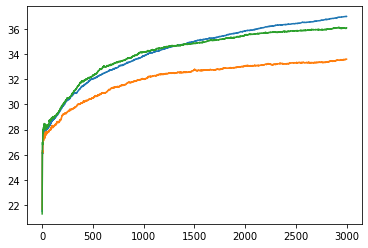

In [179]:
plt.plot(this_result_df['train_KS'])
plt.plot(this_result_df['valid_KS'])
plt.plot(this_result_df['test_KS'])

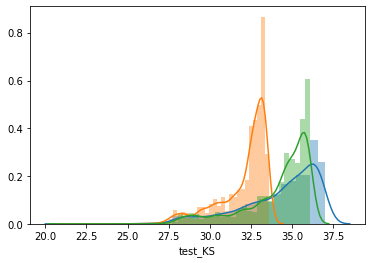

In [180]:
import seaborn as sns
sns.distplot(this_result_df['train_KS'])
sns.distplot(this_result_df['valid_KS'])
sns.distplot(this_result_df['test_KS'])

In [181]:
this_result_df.to_excel(os.path.join(save_path, 'AS_seg1_1000epochs_result_temp4.xlsx'), index = False)

In [182]:
this_result_df['diff_val_ks'].min()

7.349039435170051e-05

In [183]:
final_df_2 = this_result_df[(this_result_df['diff_val_ks'] <= 0.10) & (this_result_df['diff_tst_ks'] <= 0.10)]

In [184]:
final_df_2

,criterion,init,learning_rate,loss,max_depth,max_features,max_leaf_nodes,min_impurity_decrease,min_impurity_split,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,n_iter_no_change,presort,random_state,subsample,tol,validation_fraction,verbose,warm_start,n_estimators,train_KS,train_AR,valid_KS,valid_AR,test_KS,test_AR,diff_val_ks,diff_tst_ks,diff_val_ar,diff_tst_ar
0,friedman_mse,None,0.009,deviance,4,8,None,0.0,None,0.02,0.0255,0.0,None,auto,1,0.89,0.0001,0.1,0,False,1,21.501328,29.169750,21.676644,29.034296,21.299290,28.640039,0.008154,0.009397,0.004644,0.018160
1,friedman_mse,None,0.009,deviance,4,8,None,0.0,None,0.02,0.0255,0.0,None,auto,1,0.89,0.0001,0.1,0,False,2,25.315757,32.930280,25.404167,33.074425,25.971051,33.189161,0.003492,0.025885,0.004377,0.007861
2,friedman_mse,None,0.009,deviance,4,8,None,0.0,None,0.02,0.0255,0.0,None,auto,1,0.89,0.0001,0.1,0,False,3,26.152679,34.422118,25.833068,34.087796,26.815110,34.885795,0.012221,0.025329,0.009712,0.013470
3,friedman_mse,None,0.009,deviance,4,8,None,0.0,None,0.02,0.0255,0.0,None,auto,1,0.89,0.0001,0.1,0,False,4,26.126703,35.294423,26.357465,34.982180,26.990821,35.893570,0.008832,0.033074,0.008847,0.016976
4,friedman_mse,None,0.009,deviance,4,8,None,0.0,None,0.02,0.0255,0.0,None,auto,1,0.89,0.0001,0.1,0,False,5,26.214693,35.910919,26.245471,35.523583,26.877829,36.534175,0.001174,0.025296,0.010786,0.017356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,friedman_mse,None,0.009,deviance,4,8,None,0.0,None,0.02,0.0255,0.0,None,auto,1,0.89,0.0001,0.1,0,False,2996,36.980096,49.551701,33.578513,45.629167,36.031851,47.711401,0.091984,0.025642,0.079160,0.037139
2996,friedman_mse,None,0.009,deviance,4,8,None,0.0,None,0.02,0.0255,0.0,None,auto,1,0.89,0.0001,0.1,0,False,2997,36.990783,49.552549,33.581745,45.629321,36.031851,47.711637,0.092159,0.025924,0.079173,0.037151
2997,friedman_mse,None,0.009,deviance,4,8,None,0.0,None,0.02,0.0255,0.0,None,auto,1,0.89,0.0001,0.1,0,False,2998,36.983945,49.552730,33.581745,45.629318,36.030875,47.711419,0.091991,0.025770,0.079176,0.037159
2998,friedman_mse,None,0.009,deviance,4,8,None,0.0,None,0.02,0.0255,0.0,None,auto,1,0.89,0.0001,0.1,0,False,2999,36.989596,49.553405,33.588528,45.628594,36.030875,47.711371,0.091947,0.025919,0.079204,0.037173


In [185]:
final_df_2 = final_df_2[final_df_2['test_KS'] == final_df_2['test_KS'].max()]

In [186]:
final_df_2

,criterion,init,learning_rate,loss,max_depth,max_features,max_leaf_nodes,min_impurity_decrease,min_impurity_split,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,n_iter_no_change,presort,random_state,subsample,tol,validation_fraction,verbose,warm_start,n_estimators,train_KS,train_AR,valid_KS,valid_AR,test_KS,test_AR,diff_val_ks,diff_tst_ks,diff_val_ar,diff_tst_ar
2926,friedman_mse,None,0.009,deviance,4,8,None,0.0,None,0.02,0.0255,0.0,None,auto,1,0.89,0.0001,0.1,0,False,2927,36.930155,49.455669,33.491291,45.585515,36.108396,47.681217,0.093118,0.022252,0.078255,0.03588


In [187]:
opt_n_estimators = final_df_2['n_estimators'].tolist()[0]
opt_learning_rate = final_df_2['learning_rate'].tolist()[0]
opt_min_samples_leaf = final_df_2['min_samples_leaf'].tolist()[0]
opt_min_samples_split = final_df_2['min_samples_split'].tolist()[0]
opt_subsample = final_df_2['subsample'].tolist()[0]
opt_max_depth = final_df_2['max_depth'].tolist()[0]
opt_max_features = final_df_2['max_features'].tolist()[0]

In [188]:
final_model = GradientBoostingClassifier(
                                        n_estimators = opt_n_estimators , 
                                         learning_rate = opt_learning_rate,
                                         min_samples_leaf = opt_min_samples_leaf,
                                         min_samples_split= opt_min_samples_split,
                                         subsample=opt_subsample,
                                         max_depth =opt_max_depth,
                                         max_features= opt_max_features,
                                         random_state = 1,
                                        )

final_model.fit(X_train, np.array(y_train['BAD']))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.009, loss='deviance', max_depth=4,
                           max_features=8, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=0.02, min_samples_split=0.0255,
                           min_weight_fraction_leaf=0.0, n_estimators=2927,
                           n_iter_no_change=None, presort='auto',
                           random_state=1, subsample=0.89, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [189]:
#prob
prob_tr = final_model.predict_proba(X_train)
prob_valid = final_model.predict_proba(X_valid)
prob_test = final_model.predict_proba(X_test)
        
#Compute ks/ar
result_train = Performances(prob_tr[:, 1], y_train['BAD'])
result_valid = Performances(prob_valid[:, 1], y_valid['BAD'])
result_test = Performances(prob_test[:, 1], y_test['BAD'])

In [190]:
#Print model report:
print("\nModel Report")
print("Train KS : {:.5f}, / AR : {:.5f}".format(result_train.ks, result_train.ar))
print("Valid KS : {:.5f}, / AR : {:.5f}".format(result_valid.ks, result_valid.ar))
print("Test KS : {:.5f}, / AR : {:.5f}".format(result_test.ks, result_test.ar))


Model Report
Train KS : 36.93015, / AR : 49.45567
Valid KS : 33.49129, / AR : 45.58551
Test KS : 36.10840, / AR : 47.68122


In [191]:
result_valid.ks / result_train.ks

0.9068819572906682

In [192]:
final_result = get_result_df(final_model, X_train, y_train, X_valid, y_valid, X_test, y_test)

In [193]:
final_result

,criterion,init,learning_rate,loss,max_depth,max_features,max_leaf_nodes,min_impurity_decrease,min_impurity_split,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,n_iter_no_change,presort,random_state,subsample,tol,validation_fraction,verbose,warm_start,n_estimators,train_KS,train_AR,valid_KS,valid_AR,test_KS,test_AR,diff_val_ks,diff_tst_ks,diff_val_ar,diff_tst_ar
0,friedman_mse,None,0.009,deviance,4,8,None,0.0,None,0.02,0.0255,0.0,None,auto,1,0.89,0.0001,0.1,0,False,1,21.501328,29.169750,21.676644,29.034296,21.299290,28.640039,0.008154,0.009397,0.004644,0.018160
1,friedman_mse,None,0.009,deviance,4,8,None,0.0,None,0.02,0.0255,0.0,None,auto,1,0.89,0.0001,0.1,0,False,2,25.315757,32.930280,25.404167,33.074425,25.971051,33.189161,0.003492,0.025885,0.004377,0.007861
2,friedman_mse,None,0.009,deviance,4,8,None,0.0,None,0.02,0.0255,0.0,None,auto,1,0.89,0.0001,0.1,0,False,3,26.152679,34.422118,25.833068,34.087796,26.815110,34.885795,0.012221,0.025329,0.009712,0.013470
3,friedman_mse,None,0.009,deviance,4,8,None,0.0,None,0.02,0.0255,0.0,None,auto,1,0.89,0.0001,0.1,0,False,4,26.126703,35.294423,26.357465,34.982180,26.990821,35.893570,0.008832,0.033074,0.008847,0.016976
4,friedman_mse,None,0.009,deviance,4,8,None,0.0,None,0.02,0.0255,0.0,None,auto,1,0.89,0.0001,0.1,0,False,5,26.214693,35.910919,26.245471,35.523583,26.877829,36.534175,0.001174,0.025296,0.010786,0.017356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,friedman_mse,None,0.009,deviance,4,8,None,0.0,None,0.02,0.0255,0.0,None,auto,1,0.89,0.0001,0.1,0,False,2923,36.910596,49.448852,33.494477,45.582379,36.095027,47.678304,0.092551,0.022096,0.078191,0.035806
2923,friedman_mse,None,0.009,deviance,4,8,None,0.0,None,0.02,0.0255,0.0,None,auto,1,0.89,0.0001,0.1,0,False,2924,36.916765,49.450409,33.504173,45.582248,36.103691,47.678582,0.092440,0.022025,0.078223,0.035830
2924,friedman_mse,None,0.009,deviance,4,8,None,0.0,None,0.02,0.0255,0.0,None,auto,1,0.89,0.0001,0.1,0,False,2925,36.929350,49.453031,33.498028,45.582666,36.095027,47.680223,0.092916,0.022592,0.078263,0.035848
2925,friedman_mse,None,0.009,deviance,4,8,None,0.0,None,0.02,0.0255,0.0,None,auto,1,0.89,0.0001,0.1,0,False,2926,36.934291,49.453664,33.500623,45.584281,36.095027,47.680540,0.092967,0.022723,0.078243,0.035854


In [194]:
final_result.to_excel(os.path.join(save_path, 'AS_seg1_final_result_temp4.xlsx'), index = False)

In [195]:
# KS plotting ftn
def KS_compute_with_plot(prob, data_type):

    GOOD_p = prob[data_type == 0]
    BAD_p = prob[data_type == 1]

    ks = stats.ks_2samp(GOOD_p[:,1], BAD_p[:,1])

    ecdf_0 = sm.distributions.ECDF(GOOD_p[:,1])
    ecdf_1 = sm.distributions.ECDF(BAD_p[:,1])
    plt.plot(ecdf_0.x, ecdf_0.y, label="GOOD")
    plt.plot(ecdf_1.x, ecdf_1.y, label='BAD')
    # plt.xlim(0, 0.3)

    plt.ylabel('CDF')
    plt.xlabel('p')
    plt.title('KS : {}'.format(ks[0]))
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

    return (ks[0])

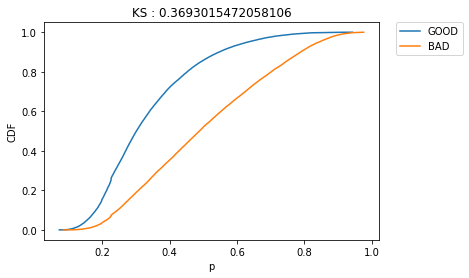

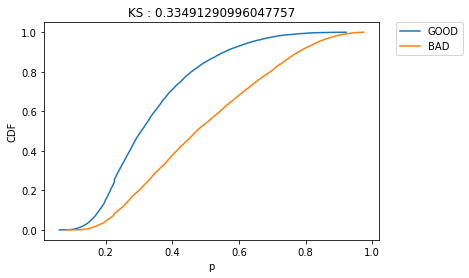

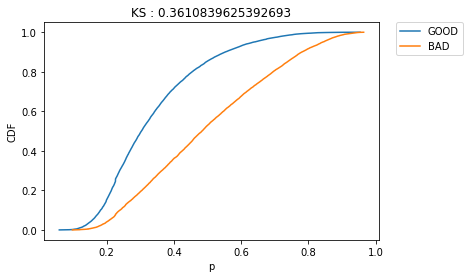

0.3610839625392693

In [196]:
KS_compute_with_plot(prob_tr, y_train['BAD'])
KS_compute_with_plot(prob_valid, y_valid['BAD'])
KS_compute_with_plot(prob_test, y_test['BAD'])

(10, 40)

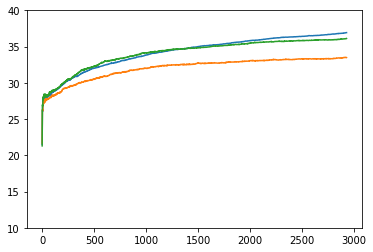

In [203]:
plt.plot(final_result['train_KS'])
plt.plot(final_result['valid_KS'])
plt.plot(final_result['test_KS'])
plt.ylim([10,40])

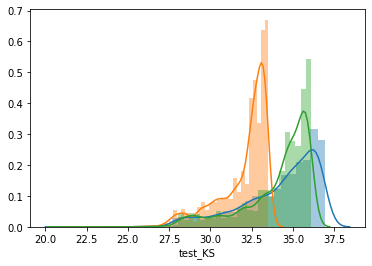

In [198]:
import seaborn as sns
sns.distplot(final_result['train_KS'])
sns.distplot(final_result['valid_KS'])
sns.distplot(final_result['test_KS'])

In [199]:
X_train.shape

(73533, 42)

In [200]:
from sklearn.externals import joblib

In [201]:
save_path

'C:\\Users\\w10\\Desktop\\웰컴\\AS\\8주차(데이터추가추출부터)\\최종적합\\seg1\\gbm'

In [202]:
model_name = save_path + os.sep + r'AS_seg1_final_model_temp4.joblib'
joblib.dump(final_model, model_name)

['C:\\Users\\w10\\Desktop\\웰컴\\AS\\8주차(데이터추가추출부터)\\최종적합\\seg1\\gbm\\AS_seg1_final_model_temp4.joblib']